In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [3]:
cus_data = pd.read_csv('Customers.csv')
trans_data = pd.read_csv('Transactions.csv')
cus_data.head()
trans_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
merged = pd.merge(cus_data , trans_data , on = 'CustomerID' , how = 'left')
merged

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
996,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4.0,868.20,217.05
997,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1.0,239.70,239.70
998,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4.0,627.84,156.96
999,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4.0,1665.60,416.40


In [5]:
cus_data = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',               
    'TransactionID': 'nunique',       
    'Quantity': 'sum',                
}).reset_index()

cus_data['AvgTransactionValue'] = cus_data['TotalValue'] / cus_data['TransactionID']

In [6]:
from sklearn.preprocessing import StandardScaler

features = ['TotalValue', 'AvgTransactionValue', 'TransactionID', 'Quantity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cus_data[features])
X_scaled

array([[-5.18843564e-02, -7.02634115e-02,  0.00000000e+00,
        -1.10735103e-01],
       [-8.62714327e-01, -9.34932971e-01, -4.51293682e-01,
        -4.34049273e-01],
       [-3.93841996e-01, -2.62713110e-02, -4.51293682e-01,
         2.12579067e-01],
       [ 1.03537505e+00, -7.67688998e-02,  1.35388105e+00,
         1.66749283e+00],
       [-7.69498612e-01, -4.00280592e-02, -9.02587365e-01,
        -9.19020528e-01],
       [ 4.22646141e-01,  1.55606020e+00, -4.51293682e-01,
        -1.10735103e-01],
       [-4.72958495e-01,  7.26220709e-01, -9.02587365e-01,
        -7.57363443e-01],
       [ 4.46583285e-01, -1.09724996e+00,  2.25646841e+00,
         1.18252158e+00],
       [-1.38789656e+00, -1.63794564e+00, -9.02587365e-01,
        -1.56564887e+00],
       [-9.41629719e-01, -1.08786883e+00, -4.51293682e-01,
        -1.10735103e-01],
       [ 1.52200990e-01,  2.46146011e-01,  0.00000000e+00,
         5.09219818e-02],
       [ 9.68183642e-01,  2.51719736e-01,  9.02587365e-01,
      

In [7]:
# Check for missing values in the features
cus_data.isnull().sum()


CustomerID             0
TotalValue             0
TransactionID          0
Quantity               0
AvgTransactionValue    1
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled_imputed)

cus_data['Cluster'] = kmeans.labels_


In [20]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_imputed)
    db_index = davies_bouldin_score(X_scaled_imputed, kmeans.labels_)
    print(f'k = {k}, Davies-Bouldin Index: {db_index}')


k = 2, Davies-Bouldin Index: 0.9422659936358797
k = 3, Davies-Bouldin Index: 1.1011411253665135
k = 4, Davies-Bouldin Index: 0.9296840364208445
k = 5, Davies-Bouldin Index: 0.951853310870702
k = 6, Davies-Bouldin Index: 0.9108023618529778
k = 7, Davies-Bouldin Index: 0.989304292952586
k = 8, Davies-Bouldin Index: 1.0022929672360645
k = 9, Davies-Bouldin Index: 0.9376875965240108
k = 10, Davies-Bouldin Index: 0.915950731934038


In [21]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_imputed)
    silhouette = silhouette_score(X_scaled_imputed, kmeans.labels_)
    print(f'k = {k}, Silhouette Score = {silhouette}')


k = 2, Silhouette Score = 0.3954777009807255
k = 3, Silhouette Score = 0.2985382218185157
k = 4, Silhouette Score = 0.3463925804957635
k = 5, Silhouette Score = 0.3097642420054811
k = 6, Silhouette Score = 0.32237322250231487
k = 7, Silhouette Score = 0.28682079991054515
k = 8, Silhouette Score = 0.30701018064967406
k = 9, Silhouette Score = 0.3105694425775215
k = 10, Silhouette Score = 0.3018782042012439


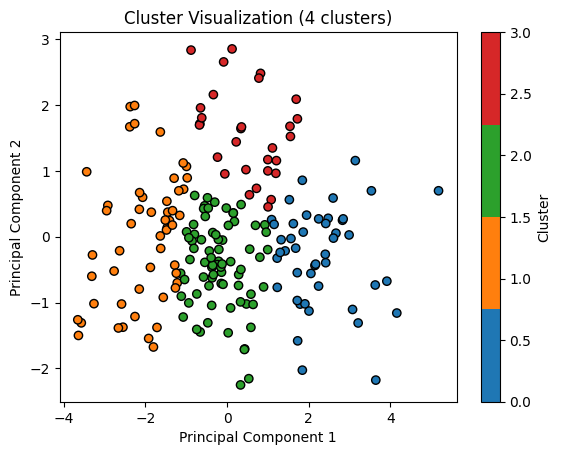

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_imputed)

colors = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=colors, edgecolor='k')
plt.title('Cluster Visualization (4 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\bhuva\AppData\Local\Temp\ipykernel_17476\1871853700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kmeans.labels_, y=cus_data['TotalValue'], palette='viridis')


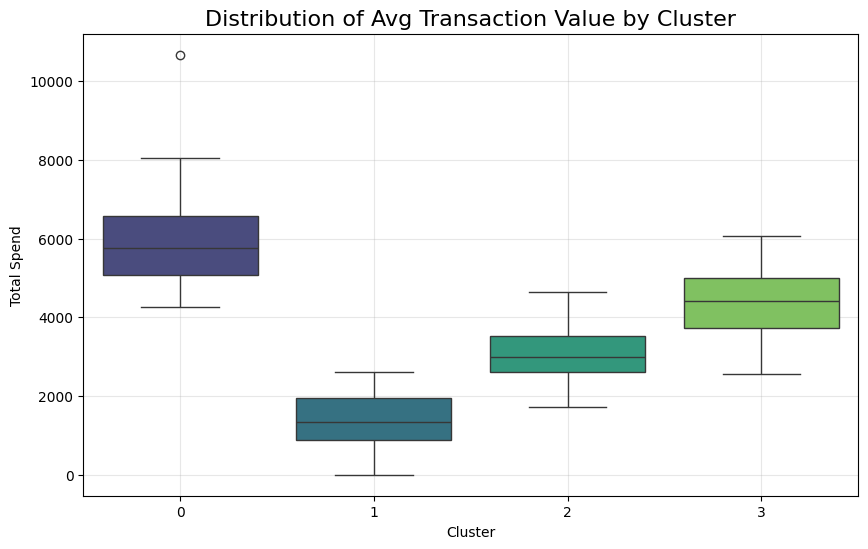

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=kmeans.labels_, y=cus_data['TotalValue'], palette='viridis')
plt.title('Distribution of Total Spend by Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.grid(alpha=0.3)
plt.show()


C:\Users\bhuva\AppData\Local\Temp\ipykernel_17476\4262773002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kmeans.labels_, y=cus_data['AvgTransactionValue'], palette='cividis')


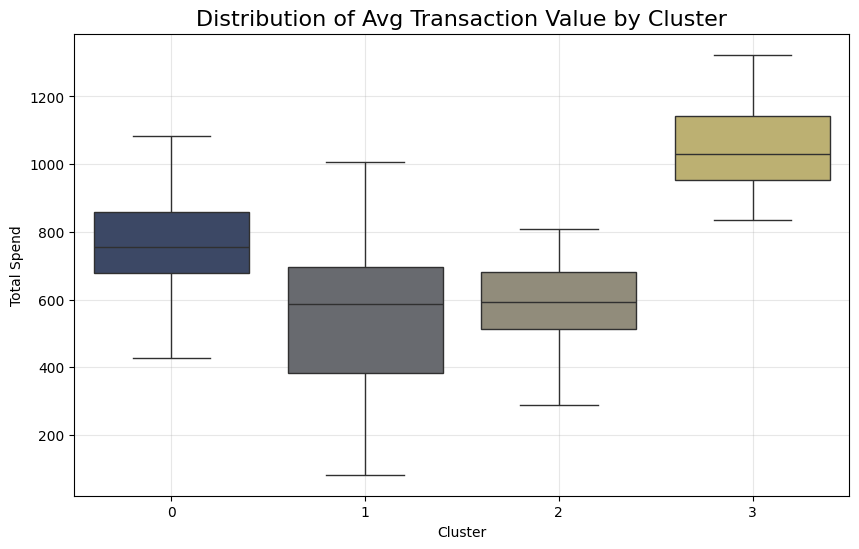

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=kmeans.labels_, y=cus_data['AvgTransactionValue'], palette='cividis')
plt.title('Distribution of Avg Transaction Value by Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.grid(alpha=0.3)
plt.show()
